

#IDENTITHEM
_Synthesis Project_



*   Amelia Gómez Grabowska (1631745)
*   Sara Martín Nuñez (1669812)
*   Lara Rodríguez Cuenca (1667906)
*   Malaika Mbayo Michelle (1695157)
*   Aina Navarro Rafols (1670797)

# PART II: Unsupervised Learning Algorithms

## Import libraries and data

In [47]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [48]:
extracted_dir_path = '/content/Identithem'
if not os.path.exists(extracted_dir_path):
    !git clone https://github.com/Identithem/Identithem.git
else:
    print("Directory already exists.")

%cd "/content/Identithem"
!git pull

Directory already exists.
/content/Identithem
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 5.25 MiB | 7.31 MiB/s, done.
From https://github.com/Identithem/Identithem
   1ba4397..a3a909b  main       -> origin/main
Updating 1ba4397..a3a909b
Fast-forward
 TEST.zip | Bin 0 -> 5501012 bytes
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 TEST.zip


In [49]:
extracted_dir_path = '/content/Identithem/TEST'
if not os.path.exists(extracted_dir_path):
    # If the directory does not exist, unzip the zip file
    %cd "/content/Identithem"
    !unzip "TEST.zip"
else:
    print("Directory already exists. Skipping unzip process.")

/content/Identithem
Archive:  TEST.zip
  inflating: TEST/test.csv           


In [50]:
##start with 22
data = pd.read_csv("/content/Identithem/TEST/test.csv")
data

,ip,status,size,n_nans,is_bot,n_requests,n_bots,n_errors,average_size,average_timedif,...,date_minute,date_second,req_verb,req_path_we,req_http,request_we,referer_we,useragent_we,is_attack,is_blacklist
0,5488240137,301,538,1,1,2,2,0,561.000000,1.000000,...,0,12,0,-0.000932,0,0.001665,-0.002216,0.030256,0,0
1,5488240137,301,584,1,1,2,2,0,561.000000,1.000000,...,0,13,0,-0.001808,0,-0.006417,-0.002216,0.030256,0,0
2,11024920167,200,8106,1,1,20,20,0,19415.650000,0.105263,...,0,24,0,-0.001224,0,-0.001013,-0.002216,0.023224,0,0
3,11024920167,200,1871,0,1,20,20,0,19415.650000,0.105263,...,0,25,0,-0.002568,0,-0.004068,-0.048319,0.023224,0,0
4,11024920167,200,190599,0,1,20,20,0,19415.650000,0.105263,...,0,25,0,-0.002956,0,-0.004762,-0.048319,0.023224,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337351,19515412693,200,454,0,1,38,38,0,12278.447368,0.027027,...,17,39,0,-0.001196,0,-0.014940,-0.004960,0.004603,0,1
337352,19515412693,200,4871,0,1,38,38,0,12278.447368,0.027027,...,17,40,0,-0.001609,0,-0.017335,-0.004960,0.004603,0,1
337353,11122514888,301,302,1,1,17,17,0,19929.058824,1652.750000,...,17,41,0,-0.000244,0,0.010044,-0.000674,0.009050,0,0
337354,11122514888,200,11438,1,1,17,17,0,19929.058824,1652.750000,...,17,42,0,-0.000352,0,0.007645,-0.000674,0.009050,0,0


## 1. Clustering algorithm: K-Means

In [51]:
# Standarize data
scaler = StandardScaler()
data_std = scaler.fit_transform(data)
data_std

array([[-0.55130492,  1.99541546, -0.06908015, ...,  0.22447962,
        -0.07040543, -1.08261818],
       [-0.55130492,  1.99541546, -0.06892895, ...,  0.22447962,
        -0.07040543, -1.08261818],
       [-0.4641705 , -0.32121421, -0.04420451, ..., -0.07718417,
        -0.07040543, -1.08261818],
       ...,
       [-0.46263459,  1.99541546, -0.06985587, ..., -0.68522823,
        -0.07040543, -1.08261818],
       [-0.46263459, -0.32121421, -0.0332524 , ..., -0.68522823,
        -0.07040543, -1.08261818],
       [-0.46263459, -0.32121421, -0.06177983, ..., -0.68522823,
        -0.07040543, -1.08261818]])

In [52]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_std)
data_pca

array([[ 2.8781772 ,  0.01971472],
       [ 2.21438691, -0.03312644],
       [ 1.75167909,  0.07603842],
       ...,
       [ 4.86904271, -0.24670581],
       [ 2.68728371,  0.3979016 ],
       [ 0.08214223,  0.38594766]])

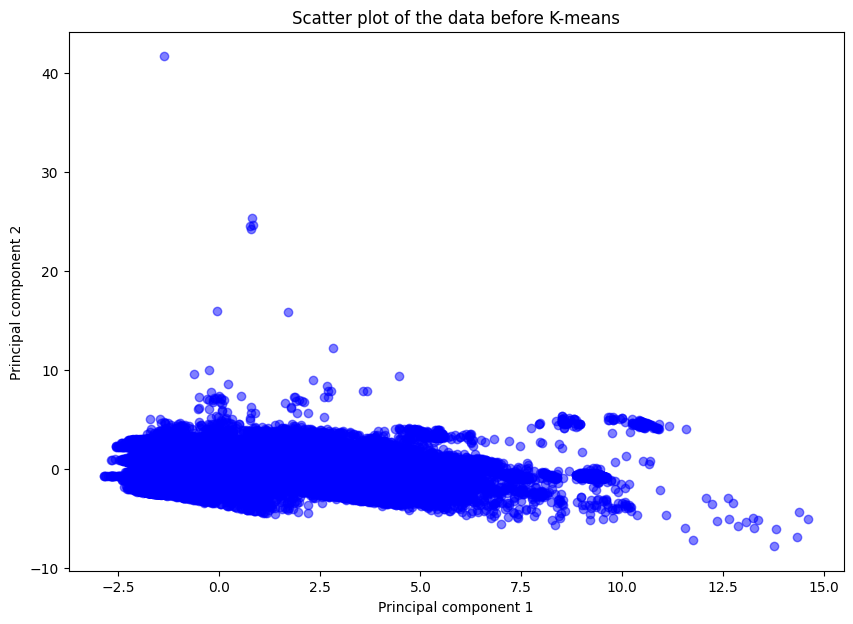

In [53]:
# Visualize scatter plot of the data before K-means
plt.figure(figsize=(10,7))
plt.scatter(data_pca[:,0],data_pca[:,1], c="blue",alpha=0.5)
plt.title("Scatter plot of the data before K-means")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.show()

In [54]:
# Defining K-Means model
kmeans = KMeans(n_clusters=2,random_state=42,n_init=10)
# Fit the model to PCA data
kmeans.fit(data_pca)
# Predict cluster labels
labels = kmeans.predict(data_pca)
# Count values for each label
unique, counts = np.unique(labels,return_counts=True)
print(dict(zip(unique,counts)))

{0: 285227, 1: 52129}


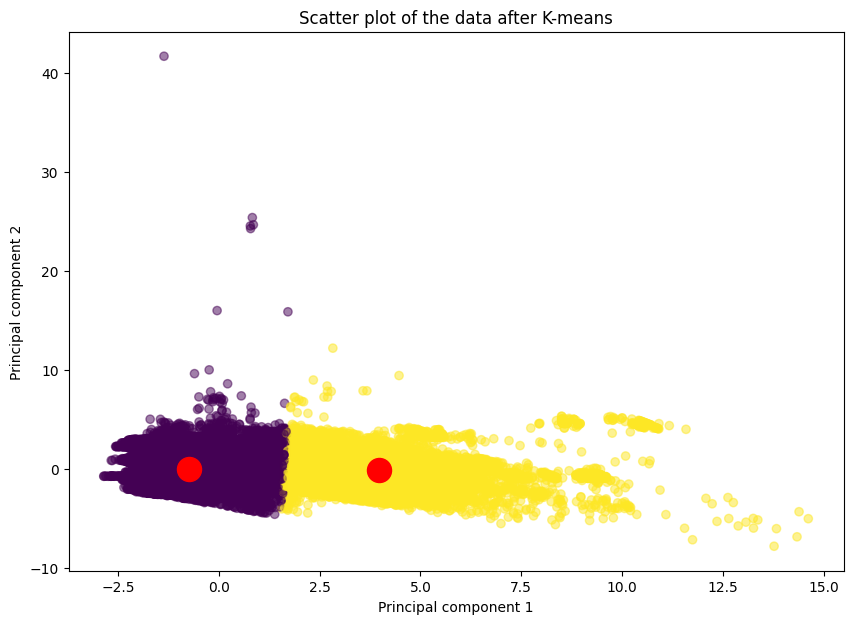

In [55]:
# Visualize clusters
plt.figure(figsize=(10,7))
plt.scatter(data_pca[:,0],data_pca[:,1],c=labels,cmap="viridis",alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="red")
plt.title("Scatter plot of the data after K-means")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.show()

In [56]:
# Compute distances to cluster centers
distances = kmeans.transform(data_pca)
# Compute anomaly score (distance to closest centroid)
scores = distances.min(axis=1)

<ipython-input-57-4102d6f3df78>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Reds")


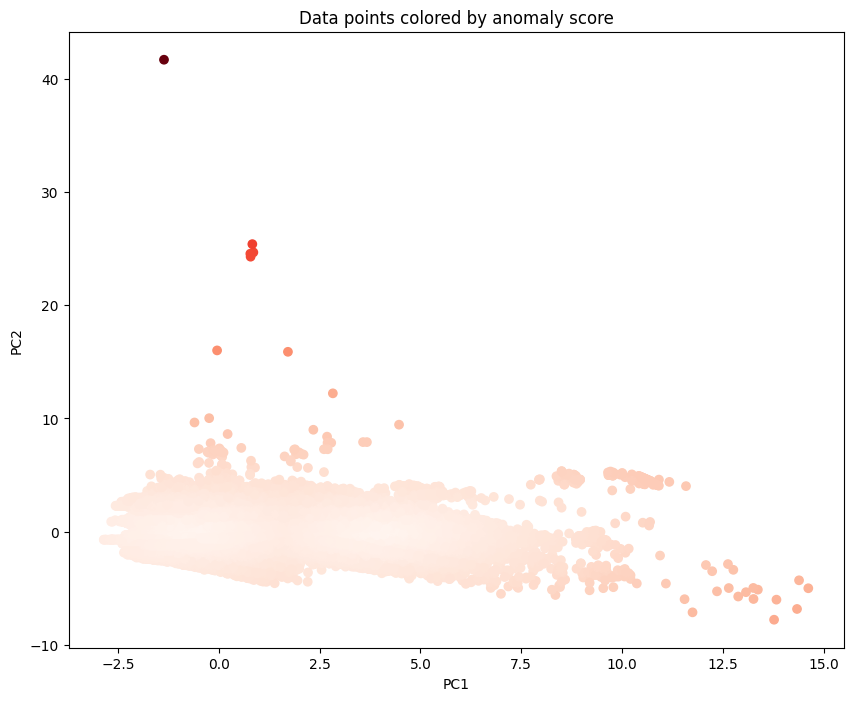

In [57]:
# Visualize anomaly scores
cmap = cm.get_cmap("Reds")
normalized_scores = (scores - min(scores)) / (max(scores) - min(scores))
plt.figure(figsize=(10,8))
plt.scatter(data_pca[:,0], data_pca[:,1],c=cmap(normalized_scores))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Data points colored by anomaly score")
plt.show()

In [58]:
# Append anomaly normalized scores to dataframe
normalized_scores_df = pd.Series(normalized_scores, name="anomaly_score")
data_with_results = pd.concat([data.reset_index(drop=True),normalized_scores_df],axis=1)

# Append label of each log line using a threshold
threshold = 0.1
data_with_results["kmeans_result"] = (data_with_results["anomaly_score"] > threshold).astype(int)

# Show results
data_with_results

,ip,status,size,n_nans,is_bot,n_requests,n_bots,n_errors,average_size,average_timedif,...,req_verb,req_path_we,req_http,request_we,referer_we,useragent_we,is_attack,is_blacklist,anomaly_score,kmeans_result
0,5488240137,301,538,1,1,2,2,0,561.000000,1.000000,...,0,-0.000932,0,0.001665,-0.002216,0.030256,0,0,0.026296,0
1,5488240137,301,584,1,1,2,2,0,561.000000,1.000000,...,0,-0.001808,0,-0.006417,-0.002216,0.030256,0,0,0.042158,0
2,11024920167,200,8106,1,1,20,20,0,19415.650000,0.105263,...,0,-0.001224,0,-0.001013,-0.002216,0.023224,0,0,0.053356,0
3,11024920167,200,1871,0,1,20,20,0,19415.650000,0.105263,...,0,-0.002568,0,-0.004068,-0.048319,0.023224,0,0,0.013471,0
4,11024920167,200,190599,0,1,20,20,0,19415.650000,0.105263,...,0,-0.002956,0,-0.004762,-0.048319,0.023224,0,0,0.017186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337351,19515412693,200,454,0,1,38,38,0,12278.447368,0.027027,...,0,-0.001196,0,-0.014940,-0.004960,0.004603,0,1,0.021300,0
337352,19515412693,200,4871,0,1,38,38,0,12278.447368,0.027027,...,0,-0.001609,0,-0.017335,-0.004960,0.004603,0,1,0.017539,0
337353,11122514888,301,302,1,1,17,17,0,19929.058824,1652.750000,...,0,-0.000244,0,0.010044,-0.000674,0.009050,0,0,0.021528,0
337354,11122514888,200,11438,1,1,17,17,0,19929.058824,1652.750000,...,0,-0.000352,0,0.007645,-0.000674,0.009050,0,0,0.032697,0


In [59]:
# Count how many log lines are anomalies and how many are normal
print("Number of anomaly logs:",(data_with_results['kmeans_result'] == 1).sum())
print("Number of normal logs:",(data_with_results['kmeans_result'] == 0).sum())

Number of anomaly logs: 4070
Number of normal logs: 333286


## 2. DBSCAN - Density-Based Spatial Clustering of Applications with Noise



In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np

X = data.values
# DBSCAN parameters
eps = 0.8  # Maximum distance between two samples to be considered as in the same neighborhood
min_samples = 5  # Minimum number of samples required for a cluster

# Fit DBSCAN to the data
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X)#2.40min

In [ ]:
# Get the labels assigned by DBSCAN (-1 for outliers, 0 and above for clusters)
labels = dbscan.labels_

# Anomalies are data points labeled as -1 (outliers)
anomaly_indices = np.where(labels == -1)[0]

# Add the DBSCAN anomaly labels as a new column in the DataFrame
data_with_results['DBSCAN_Anomaly'] = 0  # Initialize all points as not anomalies (0)
data_with_results.iloc[anomaly_indices, -1] = 1  # Set anomalies to 1

In [ ]:
c_1 = 0
c= 0
for values in data_with_results['DBSCAN_Anomaly']:
  if values == 1:
    c_1+=1
  else:
    c+=1
print("ANOMALIES (1):",c_1)
print("VALID:",c)

ANOMALIES (1): 113426
VALID: 69108


## 3. Isolation Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(data)
model = IsolationForest(contamination=0.1)
model.fit(X_std)

IsolationForest(contamination=0.1)

In [ ]:
y_pred = model.predict(X_std)
y_pred = [1 if x == -1 else 0 for x in y_pred]
data_with_results['Isolation Forest Anomaly Prediction'] = y_pred
c_0 = 0
c_1 = 0
for i,values in enumerate(data_with_results['Isolation Forest Anomaly Prediction']):
  if values == 0:
    c_0+=1
  elif values == 1:
    c_1+=1

print("Number of anomaly logs:",(data_with_results['Isolation Forest Anomaly Prediction'] == 1).sum())
print("Number of normal logs:",(data_with_results['Isolation Forest Anomaly Prediction'] == 0).sum())

Number of anomaly logs: 18254
Number of normal logs: 164280


## Local Outlier Factor (LOF) method

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.3)
y_lof = lof.fit_predict(X)#3.30 min

In [ ]:
data_with_results['LOF_Prediction'] = y_lof

In [ ]:
c_1 = 0
c= 0
for values in data_with_results['LOF_Prediction']:
  if values == 1:
    c_1+=1
  else:
    c+=1
print("VALID:",c_1)
print("ANOMALIES (-1):",c)

##GMM

In [ ]:
#4min
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Define the range of components to test
n_components_range = range(1, 11)

# Store BIC values for each number of components
bics = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X)
    bics.append(gmm.bic(X))

# Plot BIC values to find the optimal number of components
plt.plot(n_components_range, bics, marker='o')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('BIC for different number of components')
plt.show()

# Optimal number of components
optimal_n_components = n_components_range[np.argmin(bics)]
print("Optimal number of components:", optimal_n_components)


In [ ]:
from sklearn.mixture import GaussianMixture

# Train GMM
gmm = GaussianMixture(n_components=optimal_n_components)
gmm.fit(X)

# Get log-likelihoods (higher values indicate normal points, lower values indicate anomalies)
scores = gmm.score_samples(X)

In [ ]:
threshold = np.percentile(scores, 75)
# Classify as anomalies (1) or normal (0)
anomalies = scores > threshold
data_with_results['score'] = scores
data_with_results['anomaly'] = anomalies.astype(int)


In [ ]:
num_anomalies = data_with_results['anomaly'].sum()
num_normal = len(data_with_results) - num_anomalies

# Print the counts
print("Number of anomalies:", num_anomalies)
print("Number of normal data points:", num_normal)

In [ ]:
data_with_results

,ip,status,size,n_nans,is_bot,n_requests,n_bots,n_errors,average_size,average_timedif,...,useragent_we,is_attack,is_blacklist,anomaly_score,kmeans_result,DBSCAN_Anomaly,Isolation Forest Anomaly Prediction,LOF_Prediction,score,anomaly
0,47763519,301,4840,1,0,45227,0,279,5288.314945,1.909521,...,0.011857,0,1,0.100929,1,1,0,-1,-35.431194,0
1,47763519,200,5223,1,0,45227,0,279,5288.314945,1.909521,...,0.011857,0,1,0.129515,1,1,0,-1,-35.769869,0
2,407716753,404,2509,1,1,34,34,3,17878.264706,2600.060606,...,0.014657,0,0,0.251344,1,1,1,-1,-83.521349,0
3,47763519,301,4840,1,0,45227,0,279,5288.314945,1.909521,...,0.010226,0,1,0.100340,1,1,0,1,-35.191988,0
4,47763519,200,5260,1,0,45227,0,279,5288.314945,1.909521,...,0.010226,0,1,0.127262,1,1,0,1,-35.557938,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182529,16811968184,200,717,0,1,375,375,0,11601.168000,221.082888,...,0.033380,0,1,0.016956,0,0,0,1,24.118067,0
182530,16811968184,200,454,0,1,375,375,0,11601.168000,221.082888,...,0.033380,0,1,0.015903,0,0,0,1,26.523632,1
182531,16811968184,200,4825,0,1,375,375,0,11601.168000,221.082888,...,0.033380,0,1,0.046800,0,0,0,1,7.123677,0
182532,5270240171,200,14196,1,1,726,726,35,138743.340220,12.631724,...,0.002176,0,1,0.184364,1,0,1,1,-68.604703,0


## Total normal logs based on all methods

In [ ]:
# Creating the 'is_Anomaly' feature based on the conditions
data_with_results['is_Anomaly'] = (
    (data_with_results['kmeans_result'] == 1) |
    (data_with_results['DBSCAN_Anomaly'] == 1) |
    (data_with_results['Isolation Forest Anomaly Prediction'] == 1) |
    (data_with_results['LOF_Prediction'] == -1) |
    (data_with_results['anomaly'] == 1)
).astype(int)

# Display the DataFrame with the new feature
data_with_results

In [ ]:
# Calculate the number of rows that are anomaly
anomaly_count = data_with_results['is_Anomaly'].sum()

# Calculate the number of rows that are normal
normal_count = (data_with_results.shape[0]) - anomaly_count

# Print the counts
print("Number of anomaly logs based on all models is:", anomaly_count)
print("Number of normal logs based on all models is:", normal_count)

In [ ]:
data_with_results.to_csv('identithem_logs_onefile_unsupervisedmethods.csv', index=False)

In [ ]:
data_with_results.columns

In [ ]:
chosen_cols = ['ip', 'status', 'size', 'n_nans', 'is_bot', 'n_requests', 'n_bots',
       'n_errors', 'average_size', 'average_timedif', 'sec_since_last_req',
       'sec_until_next_req', 'n_useragents', 'date_month', 'date_day',
       'date_hour', 'date_minute', 'date_second', 'req_verb', 'req_path_we',
       'req_http', 'request_we', 'referer_we', 'useragent_we', 'is_attack',
       'is_blacklist']

final_df = data_with_results[chosen_cols].copy()
filtered_df = final_df[data_with_results['is_Anomaly'] == 1]
filtered_df

,ip,status,size,n_nans,is_bot,n_requests,n_bots,n_errors,average_size,average_timedif,...,date_minute,date_second,req_verb,req_path_we,req_http,request_we,referer_we,useragent_we,is_attack,is_blacklist
0,47763519,301,4840,1,0,45227,0,279,5288.314945,1.909521,...,0,0,0,-0.001427,0,0.016799,-0.005425,0.011857,0,1
1,47763519,200,5223,1,0,45227,0,279,5288.314945,1.909521,...,0,1,0,-0.001427,0,0.016799,-0.005425,0.011857,0,1
2,407716753,404,2509,1,1,34,34,3,17878.264706,2600.060606,...,0,6,0,-0.000691,0,0.015648,-0.005425,0.014657,0,0
3,47763519,301,4840,1,0,45227,0,279,5288.314945,1.909521,...,0,6,0,-0.001427,0,0.016799,-0.005425,0.010226,0,1
4,47763519,200,5260,1,0,45227,0,279,5288.314945,1.909521,...,0,7,0,-0.001427,0,0.016799,-0.005425,0.010226,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182527,16811968184,200,11040,0,1,375,375,0,11601.168000,221.082888,...,59,55,0,-0.001292,0,0.014819,-0.029358,0.033380,0,1
182528,16811968184,200,1242,0,1,375,375,0,11601.168000,221.082888,...,59,55,0,-0.001241,0,0.035092,-0.029358,0.033380,0,1
182530,16811968184,200,454,0,1,375,375,0,11601.168000,221.082888,...,59,55,0,-0.001042,0,0.028277,-0.029358,0.033380,0,1
182532,5270240171,200,14196,1,1,726,726,35,138743.340220,12.631724,...,59,55,0,-0.001066,0,0.020587,-0.005425,0.002176,0,1


In [ ]:
filtered_df.to_csv('identithem_logs_notnormal.csv', index=False)